# **PREPROCESSING** - Ecoli

## Kriteria Tugas :
1. Download dataset ecoli dari UCI https://archive.ics.uci.edu/dataset/39/ecoli
2. Simpan didatabase MySQL
3. Tampilkan data dalam scatter plot  menggunakan PCA.
   PCA mentransformasi data menjadi dimensi rendah (2)
4. Lakukan penyeimbangan data menggunakan ADASYN
5. Ploting data dari data yang diimbangkan menggunakan PCA, tandai data data hasil generatenya

Penjelasan lebih lengkap mengenai Oversampling : https://hackmd.io/@ProyekSaindData/BJE4Lopsee

## Simpan didatabase MySQL

In [8]:
!pip install pymysql
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [23]:
import pymysql

# Konfigurasi koneksi
host = "mysqlpendata-ilhamalmafazt-dm.h.aivencloud.com"  # Ganti host dengan host dari Aiven.io
port = 19867
user = "avnadmin"
password = "AVNS_vnxDk9lOvZgFnuKlezN"
database = "ecoli"

# Buat koneksi
mysql_conn = pymysql.connect(
    host=host,
    port=port,
    user=user,
    password=password,
    database=database,
    ssl={'ssl': {}}  # Jika menggunakan SSL
)

cursor = mysql_conn.cursor()
cursor.execute("SELECT * FROM ecoli.ecoli_data LIMIT 5;")
tampil = cursor.fetchall()
for data in tampil:
    print(data)
mysql_conn.close()

('AAS_ECOLI', 0.44, 0.52, 0.48, 0.5, 0.43, 0.47, 0.54, 'im')
('AAT_ECOLI', 0.49, 0.29, 0.48, 0.5, 0.56, 0.24, 0.35, 'cp')
('ACEA_ECOLI', 0.07, 0.4, 0.48, 0.5, 0.54, 0.35, 0.44, 'cp')
('ACEK_ECOLI', 0.56, 0.4, 0.48, 0.5, 0.49, 0.37, 0.46, 'cp')
('ACKA_ECOLI', 0.59, 0.49, 0.48, 0.5, 0.52, 0.45, 0.36, 'cp')


## Tampilkan data dalam scatter plot  menggunakan PCA. PCA mentransformasi data menjadi dimensi rendah (2)


/tmp/ipython-input-622454543.py:25: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, mysql_conn)


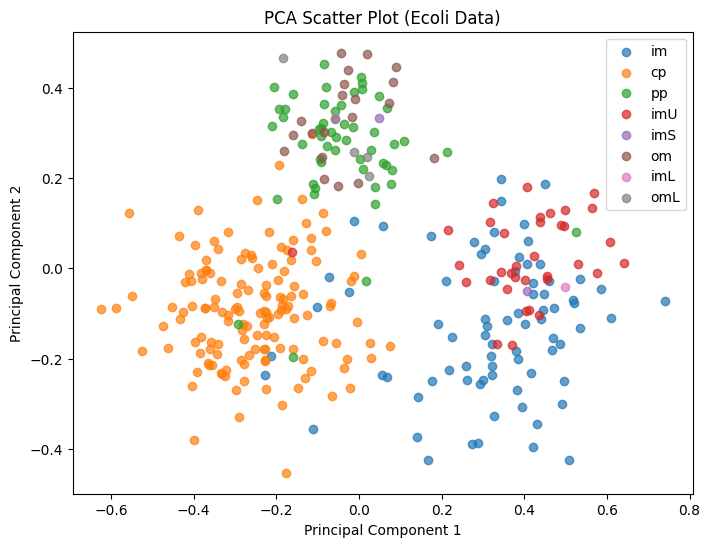

In [29]:
import pymysql
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Konfigurasi koneksi
host = "mysqlpendata-ilhamalmafazt-dm.h.aivencloud.com"
port = 19867
user = "avnadmin"
password = "AVNS_vnxDk9lOvZgFnuKlezN"
database = "defaultdb"

# Buat koneksi
mysql_conn = pymysql.connect(
    host=host,
    port=port,
    user=user,
    password=password,
    database=database,
    ssl={'ssl': {}}
)

# Ambil data ke DataFrame
query = "SELECT * FROM ecoli.ecoli_data;"
df = pd.read_sql(query, mysql_conn)

mysql_conn.close()

# Pisahkan fitur numerik (buang kolom string seperti Sequence & class)
X = df.drop(columns=["Sequence", "class"])

# Lakukan PCA ke 2 dimensi
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Buat DataFrame hasil PCA
df_pca = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
df_pca["class"] = df["class"]  # tambahkan class untuk label warna

# Scatter plot
plt.figure(figsize=(8,6))
for c in df_pca["class"].unique():
    subset = df_pca[df_pca["class"] == c]
    plt.scatter(subset["PC1"], subset["PC2"], label=c, alpha=0.7)

plt.title("PCA Scatter Plot (Ecoli Data)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()


Install terlebih dulu library pendukung

```!pip install imbalanced-learn```

In [31]:
!pip install imbalanced-learn

## SMOTE

### Penyeimbangan menggunakan Smote

In [56]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from collections import Counter

# Misalnya df sudah ada (hasil query MySQL)
# Target = kolom 'class', fitur = selain 'Sequence' & 'class'
X = df.drop(columns=["Sequence", "class"])
y = df["class"]

# Pastikan semua fitur numerik
X = X.apply(pd.to_numeric, errors="coerce").fillna(0)

# Distribusi awal
print("Distribusi awal:", Counter(y))

smote = SMOTE(random_state=42, k_neighbors=1)  # important: k_neighbors <= number of samples in minority class
X_res, y_res = smote.fit_resample(X, y)

# Distribusi setelah SMOTE
print("Distribusi setelah SMOTE:", Counter(y_res))

Distribusi awal: Counter({'cp': 143, 'im': 77, 'pp': 52, 'imU': 35, 'om': 20, 'omL': 5, 'imS': 2, 'imL': 2})
Distribusi setelah SMOTE: Counter({'im': 143, 'cp': 143, 'pp': 143, 'imU': 143, 'imS': 143, 'om': 143, 'imL': 143, 'omL': 143})


### Visualisasi Menggunakan Smote

Distribusi awal: Counter({'cp': 143, 'im': 77, 'pp': 52, 'imU': 35, 'om': 20, 'omL': 5, 'imS': 2, 'imL': 2})
Distribusi setelah SMOTE: Counter({'im': 143, 'cp': 143, 'pp': 143, 'imU': 143, 'imS': 143, 'om': 143, 'imL': 143, 'omL': 143})


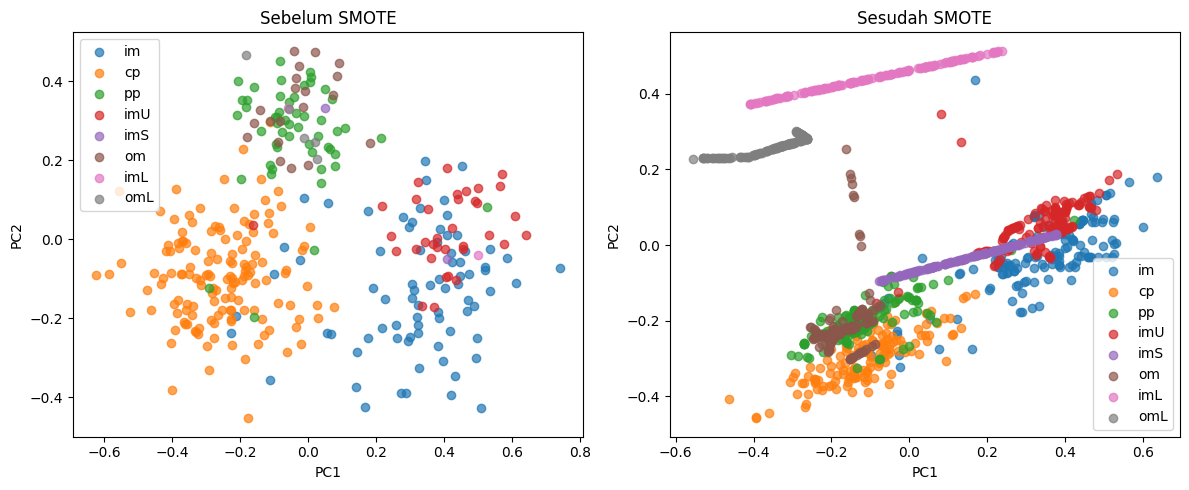

In [59]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Misalnya df sudah ada (hasil query MySQL)
X = df.drop(columns=["Sequence", "class"])
y = df["class"]

# Pastikan numerik
X = X.apply(pd.to_numeric, errors="coerce").fillna(0)

# Distribusi awal
print("Distribusi awal:", Counter(y))

# --- SMOTE ---
smote = SMOTE(random_state=42, k_neighbors=1)  # k_neighbors disesuaikan dataset
X_res, y_res = smote.fit_resample(X, y)

print("Distribusi setelah SMOTE:", Counter(y_res))

# --- PCA untuk visualisasi ---
pca = PCA(n_components=2)
X_pca_before = pca.fit_transform(X)
X_pca_after = pca.fit_transform(X_res)

# --- Plot sebelum SMOTE ---
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
for c in pd.Series(y).unique():
    subset = X_pca_before[pd.Series(y)==c]
    plt.scatter(subset[:,0], subset[:,1], label=c, alpha=0.7)
plt.title("Sebelum SMOTE")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()

# --- Plot sesudah SMOTE ---
plt.subplot(1,2,2)
for c in pd.Series(y_res).unique():
    subset = X_pca_after[pd.Series(y_res)==c]
    plt.scatter(subset[:,0], subset[:,1], label=c, alpha=0.7)
plt.title("Sesudah SMOTE")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()

plt.tight_layout()
plt.show()


## ADASYN

### Penyeimbangan data menggunakan ADASYN

In [64]:
from imblearn.over_sampling import ADASYN
from collections import Counter

# Data preparation
nt = X.copy()
ns = y.copy()

print("Distribusi awal:", Counter(ns))

class_counts = Counter(ns)
print("Class counts:", class_counts)

# Urutkan kelas dari yang paling sedikit ke paling banyak
sorted_classes = sorted(class_counts.items(), key=lambda x: x[1])
print("Sorted classes by count:", sorted_classes)

# Coba ADASYN bertahap untuk kelas minoritas
for i, (cls, count) in enumerate(sorted_classes[:-1]):  # Skip kelas mayoritas
    if count > 1:  # Hanya untuk kelas dengan cukup samples
        n_neighbors = min(5, count - 1)  # Pastikan n_neighbors aman

        print(f"\n📊 Processing class '{cls}' (count: {count}) with n_neighbors={n_neighbors}")

        try:
            adasyn = ADASYN(
                n_neighbors=n_neighbors,
                sampling_strategy={cls: count + 10}  # Naikkan 10 sampel
            )
            nt, ns = adasyn.fit_resample(nt, ns)
            print(f"✅ Success for class '{cls}'")
            print(f"   New distribution: {Counter(ns)}")
        except Exception as e:
            print(f"❌ Failed for class '{cls}': {e}")
            continue

print(f"\n🎯 Final distribution: {sorted(Counter(ns).items())}")

Distribusi awal: Counter({'cp': 143, 'im': 77, 'pp': 52, 'imU': 35, 'om': 20, 'omL': 5, 'imS': 2, 'imL': 2})
Class counts: Counter({'cp': 143, 'im': 77, 'pp': 52, 'imU': 35, 'om': 20, 'omL': 5, 'imS': 2, 'imL': 2})
Sorted classes by count: [('imS', 2), ('imL', 2), ('omL', 5), ('om', 20), ('imU', 35), ('pp', 52), ('im', 77), ('cp', 143)]

📊 Processing class 'imS' (count: 2) with n_neighbors=1
✅ Success for class 'imS'
   New distribution: Counter({'cp': 143, 'im': 77, 'pp': 52, 'imU': 35, 'om': 20, 'imS': 12, 'omL': 5, 'imL': 2})

📊 Processing class 'imL' (count: 2) with n_neighbors=1
✅ Success for class 'imL'
   New distribution: Counter({'cp': 143, 'im': 77, 'pp': 52, 'imU': 35, 'om': 20, 'imS': 12, 'imL': 12, 'omL': 5})

📊 Processing class 'omL' (count: 5) with n_neighbors=4
✅ Success for class 'omL'
   New distribution: Counter({'cp': 143, 'im': 77, 'pp': 52, 'imU': 35, 'om': 20, 'omL': 15, 'imS': 12, 'imL': 12})

📊 Processing class 'om' (count: 20) with n_neighbors=5
✅ Success for 

### Visualisasi ADASYN menggunakan PCA


🎯 Final distribution: [('cp', 143), ('im', 77), ('imL', 12), ('imS', 12), ('imU', 38), ('om', 29), ('omL', 15), ('pp', 59)]


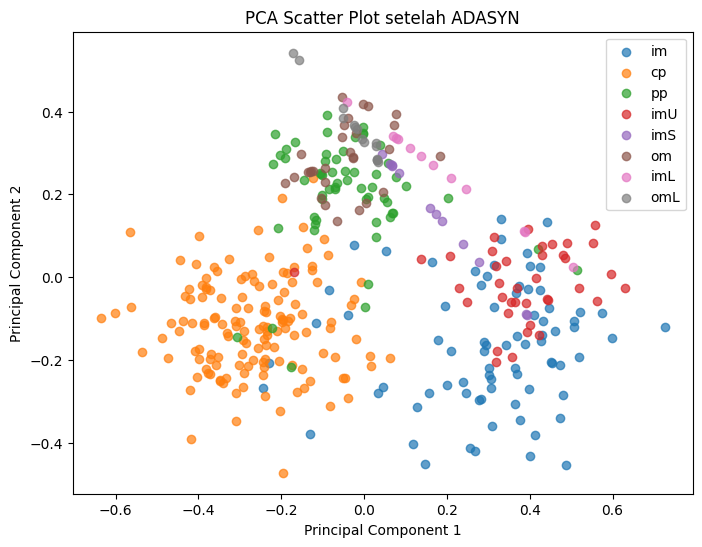

In [68]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# --- Setelah ADASYN selesai ---
print(f"\n🎯 Final distribution: {sorted(Counter(ns).items())}")

# PCA ke 2 dimensi
pca = PCA(n_components=2)
X_pca = pca.fit_transform(nt)

# Buat DataFrame hasil PCA untuk plotting
df_pca = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
df_pca["class"] = ns.values if isinstance(ns, pd.Series) else ns  # pastikan ns bisa dipakai

# Scatter plot
plt.figure(figsize=(8,6))
for c in df_pca["class"].unique():
    subset = df_pca[df_pca["class"] == c]
    plt.scatter(subset["PC1"], subset["PC2"], label=c, alpha=0.7)

plt.title("PCA Scatter Plot setelah ADASYN")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()


## Ploting data dari data yang diimbangkan menggunakan PCA, tandai data data hasil generatenya

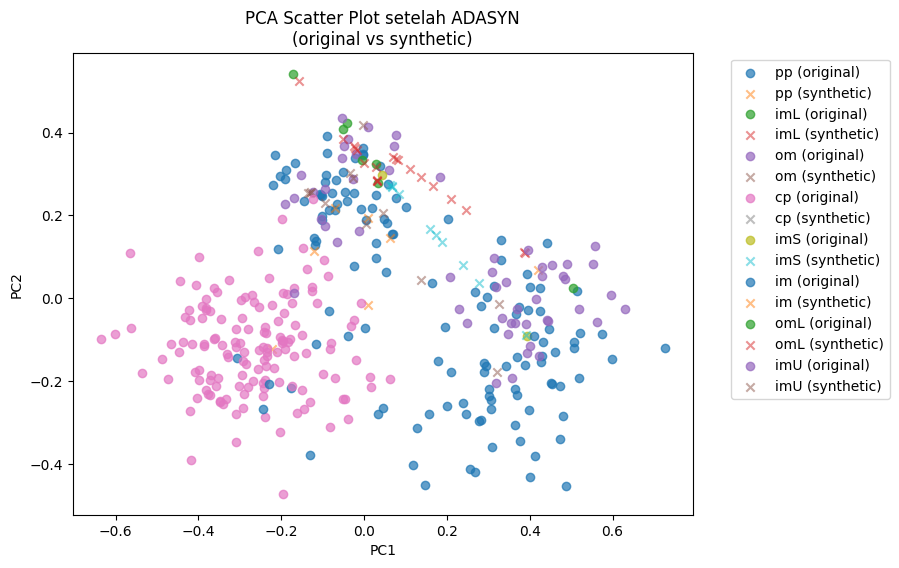

In [69]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Simpan jumlah data asli
n_original = len(X)

# Setelah ADASYN (misalnya variabel hasilnya nt, ns)
X_resampled, y_resampled = nt, ns

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_resampled)

# Tandai asli vs sintetis
is_synthetic = [i >= n_original for i in range(len(X_resampled))]

plt.figure(figsize=(8,6))
for cls in set(y_resampled):
    mask_class = (y_resampled == cls)
    plt.scatter(
        X_pca[mask_class & ~pd.Series(is_synthetic), 0],
        X_pca[mask_class & ~pd.Series(is_synthetic), 1],
        label=f"{cls} (original)",
        alpha=0.7, marker="o"
    )
    plt.scatter(
        X_pca[mask_class & pd.Series(is_synthetic), 0],
        X_pca[mask_class & pd.Series(is_synthetic), 1],
        label=f"{cls} (synthetic)",
        alpha=0.5, marker="x"
    )

plt.title("PCA Scatter Plot setelah ADASYN\n(original vs synthetic)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
